## HR Analytics Project- Understanding the Attrition in HR

## Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
#### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
#### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
#### How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
#### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [388]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import *
warnings.filterwarnings('ignore')

In [389]:
data=pd.read_csv(r"C:\Users\JPGD\Documents\ANDREA GOMEZ\FLIP ROBO TECHNOLOGIES INTERNSHIP\Projects\Evaluation Projects\Datasets\HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Exploration:

In [390]:
# Checking the dimension of the dataset.

data.shape

(1470, 35)

The dataset has 1470 observations and 35 features, out of which Attrition is the target variable.

In [391]:
# Getting an overview of the dataset by checking it's information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

According to the dataset information, there are no missing values and most of the data values are integers. There is no continuous data.

In [392]:
# Checkin missing values

data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In this way I can confirm there are no missing data in the dataset.

In [393]:
# Checking number of unique values in each column
# If there is a feature with just one value, it can be dropped.
data.nunique().to_frame("Unique values per feature")

,Unique values per feature
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [394]:
# Checking the unique values per feature in the train dataset

for i in data.select_dtypes(include='object').columns:
    print(data[i].unique())
    #print("\n")

['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']


In [395]:
# Checking value counts per categorical feature 
for i in data.select_dtypes(include='object').columns:
    print(data[i].value_counts())
    print("\n")

No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Male      882
Female    588
Name: Gender, dtype: int64


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


Y    1470
Name: Over18, dtype: int64


No     1054
Yes   

## Description of DataSet

In [396]:
# Data description - to get an overview of numerical data

round(data.describe(),2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.0,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.0,602.02,1.09,20.33,0.71,1.11,...,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,...,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,491.25,2.00,48.00,2.00,1.00,...,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


From the data description above I can see the following:

- The count of all columns are the same, which confirms once again that there are no missing values in this dataset.
- High std values in features (Age,DailyRate,EmployeeNumber,HourlyRate) show that the data points are spread out further from the mean.
- However, the mean and the median values are close together in all visible features, indicating that there is a symmetrical distribution in most of the features. Overall, the distribution is not skewed too badly in all features.

In [397]:
# Checking duplicates

print("Total Duplicate Rows are:", data.duplicated().sum())

Total Duplicate Rows are: 0


There are no duplicates in the dataset.

## Separate numerical features

In [398]:
# Separating Numerical columns
NumericData=[i for i in data.columns if ((data[i].dtypes!='object')& (i not in ['Attrition']))]

# Checking the discrete columns
data[NumericData].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [399]:
print(NumericData)
print("There are",len(NumericData),"discrete features in the dataset.")

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
There are 26 discrete features in the dataset.


In [400]:
# Separating Categorical columns in the dataset.

categoricalFeatures=[x for x in data.columns if ((data[x].dtypes=='object') & (x not in ['Attrition']))]

In [401]:
print(categoricalFeatures)
print("There are",len(categoricalFeatures),"categorical features in the train dataset.")

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
There are 8 categorical features in the train dataset.


## Data Visualization

## Categorical feature distribution

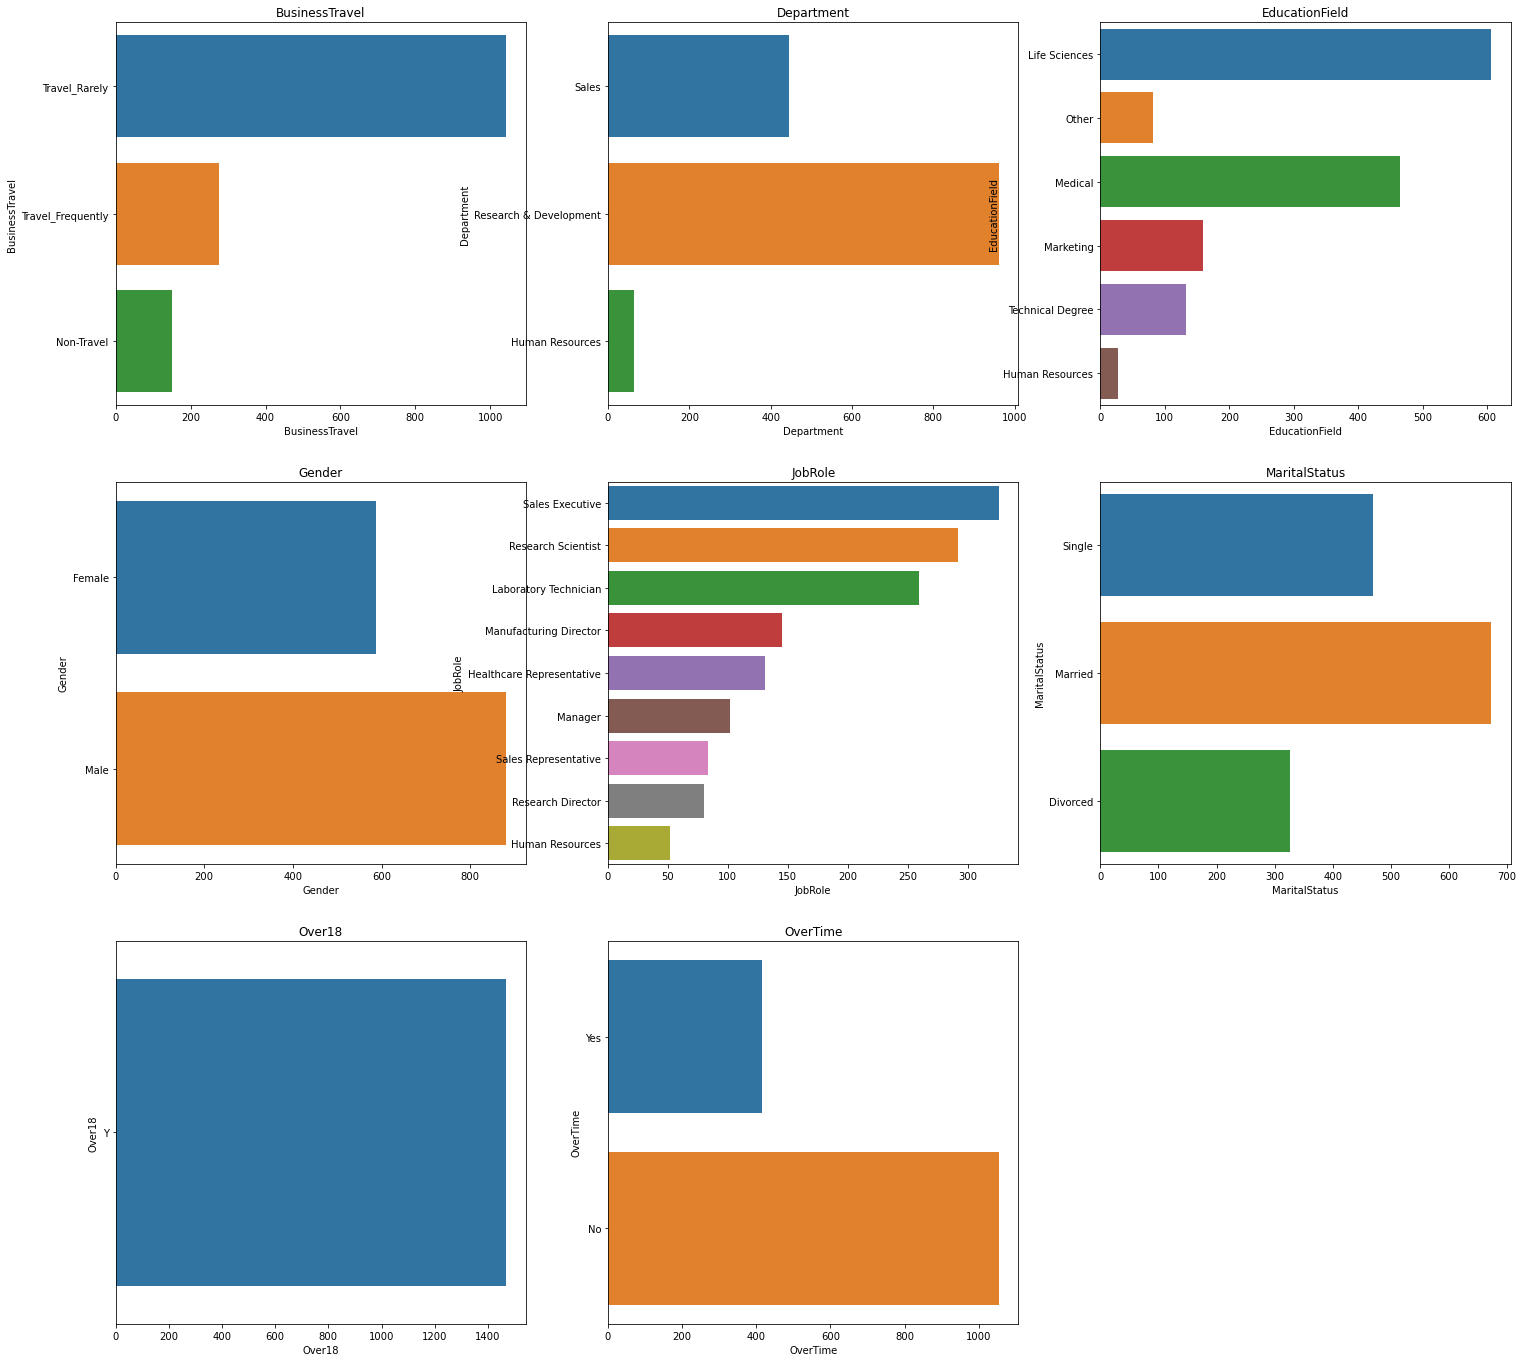

In [402]:
# Categorical feature distribution
# Checking count

plt.figure(figsize=(25,100),facecolor="white")
plotnumber=1

for i in categoricalFeatures:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=i, data=data)
    plt.xlabel(i)
    plt.title(i)
    plotnumber+=1
plt.show()

From the data above I can see the following:
- Over18 Feature has a unique value "Y". I assume this is because legal age to work is >18.
- Most of the employees travel but rarely. 
- This data collected corresponds mainly from the Research and Development Department. Or this is a big department in the company.
- The field of education of the employees corresponds mostly to LifeSciences and Medical. Very few correspond to Human Resources. 
- There are more males than females.
- There are more people in Sales Executive, Research Scientist and Laboratory Technician job roles.
- The majority of employees are married. However, there are more people single than divorced.
- The majoritty do not work overtime.

## Categorical features Vs. Target Variable

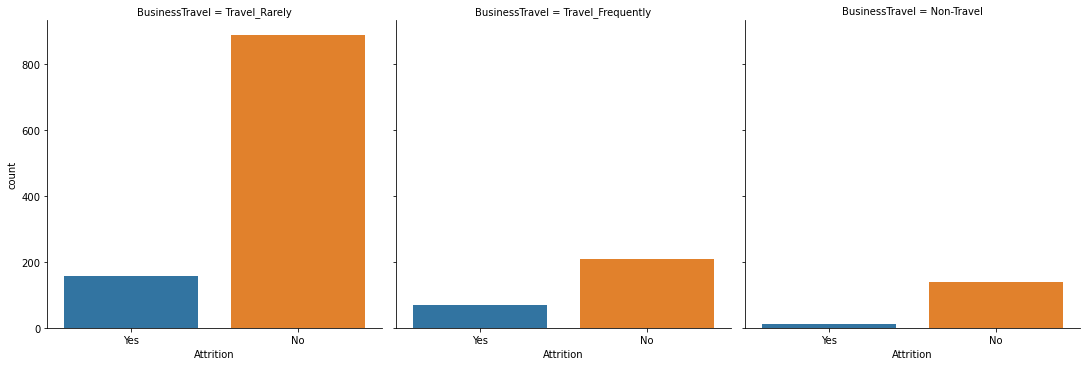

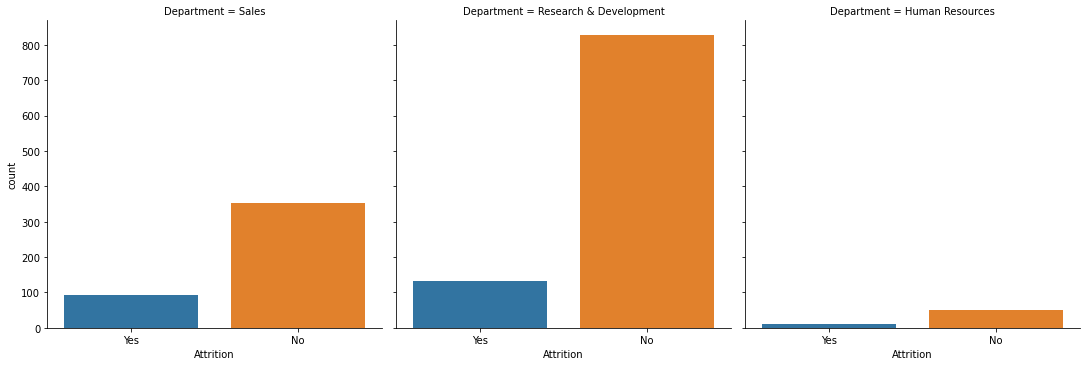

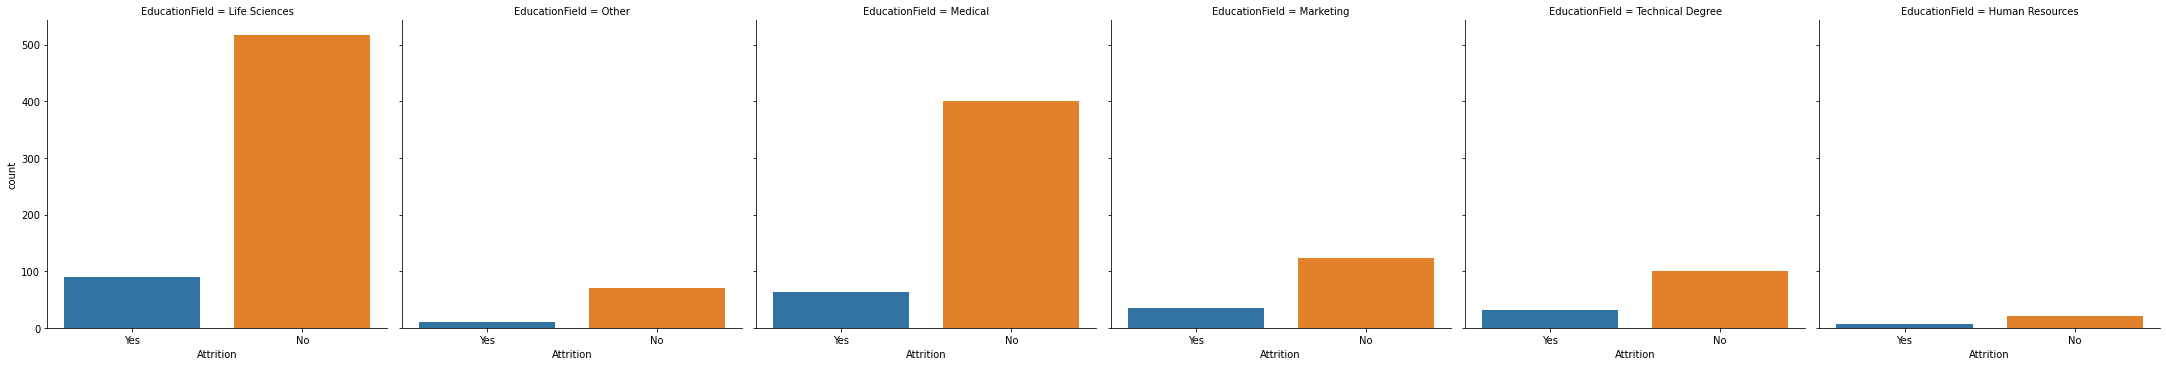

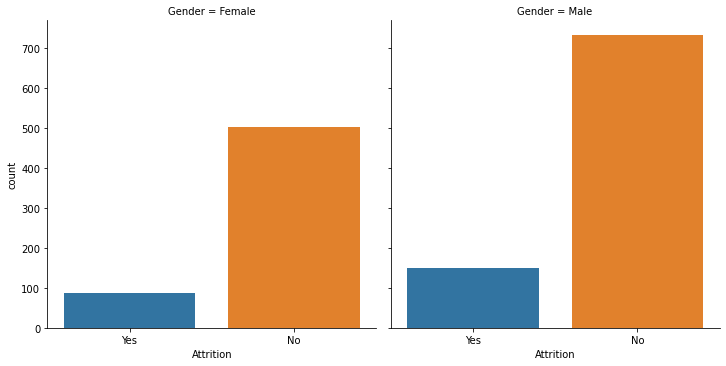

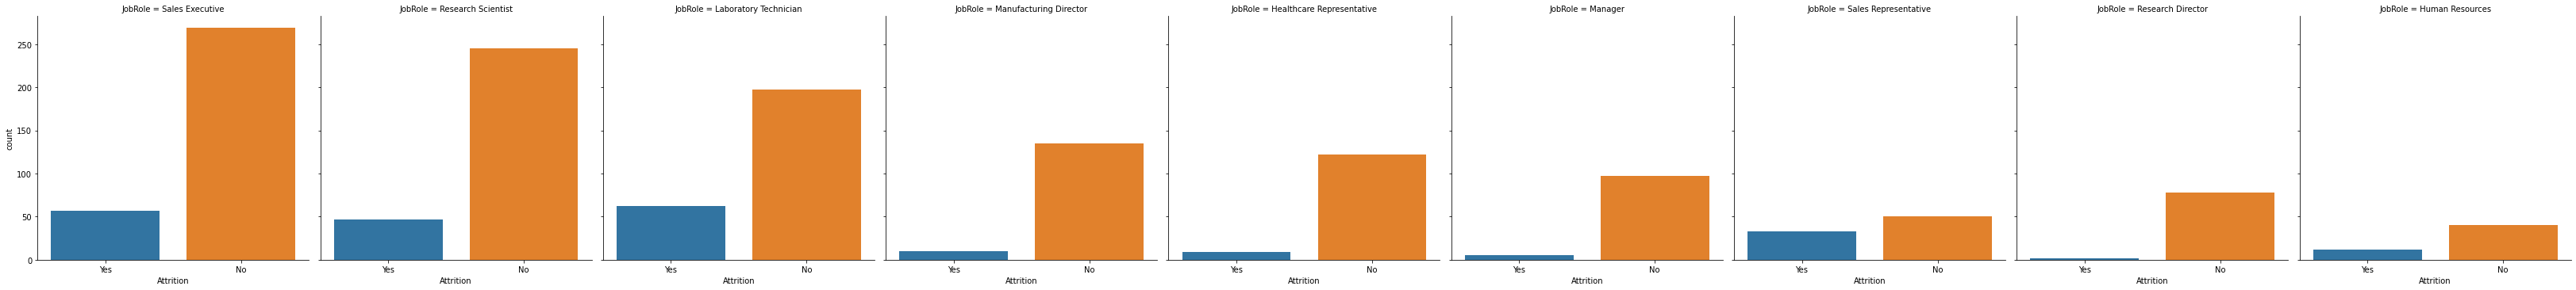

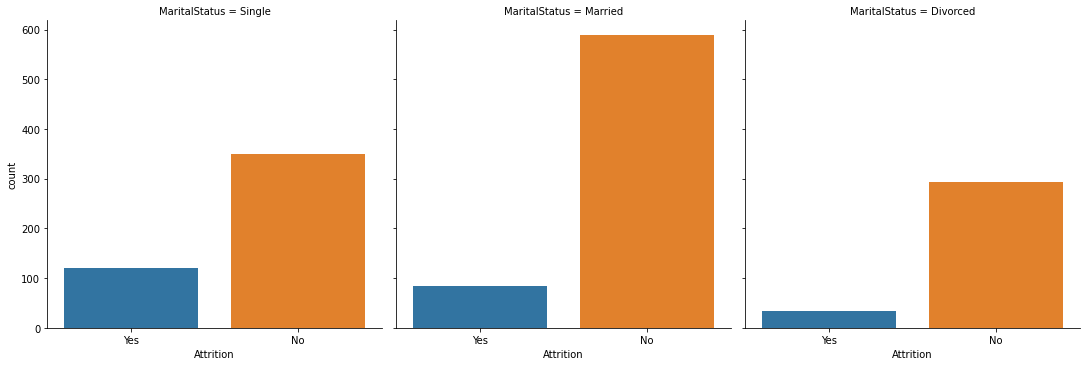

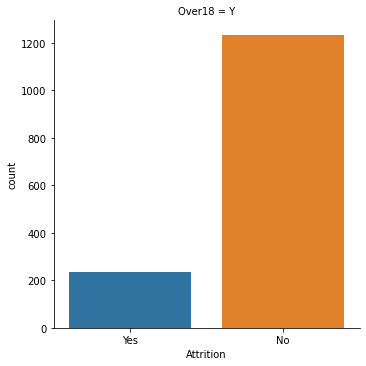

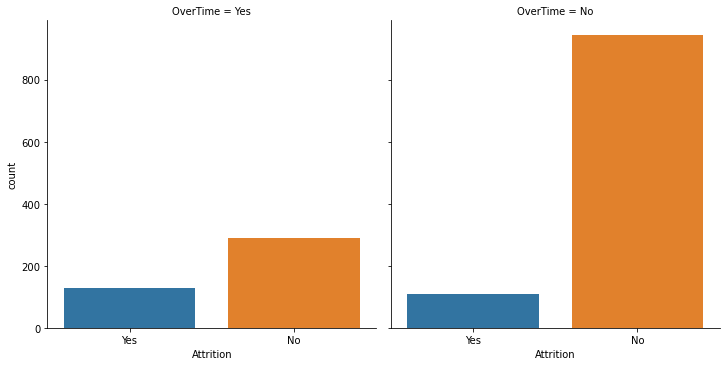

In [403]:
# Relation between categorical features and the label

for i in categoricalFeatures:
    sns.catplot(x='Attrition',col=i,kind='count',data=data)
plt.show()

In relation to target variable, Attrition is higher when:
- People have to travel rarely and lower when they don't have to travel.
- People are in Research & Development and lower when they are in Human Resources department.
- People education field is Life Sciences and lower when it is Human Resources.
- The employee is a male and lower when the employee is female.
- The employee is single and lower when the employee is divorced.
- People have to work overtime.

## Numerical feature distribution

<Figure size 2160x6480 with 0 Axes>

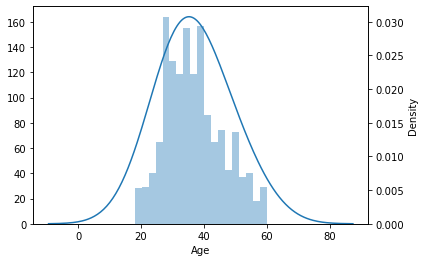

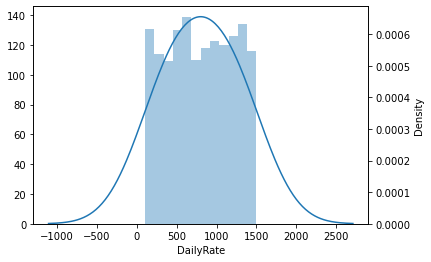

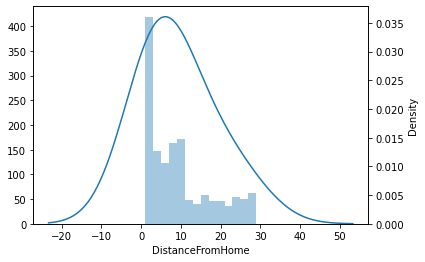

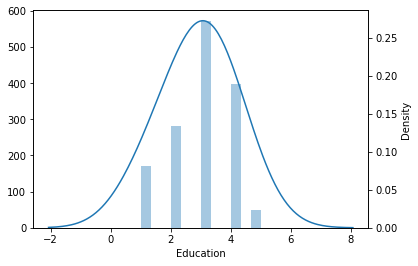

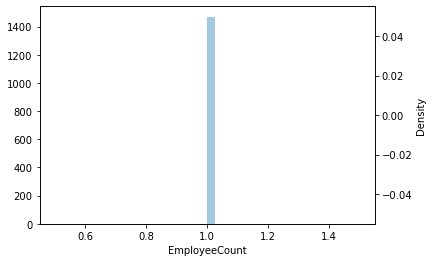

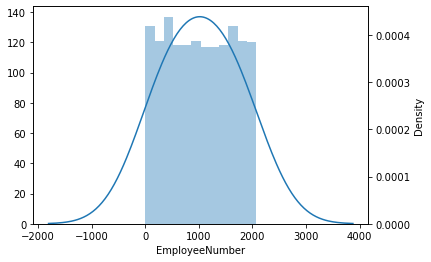

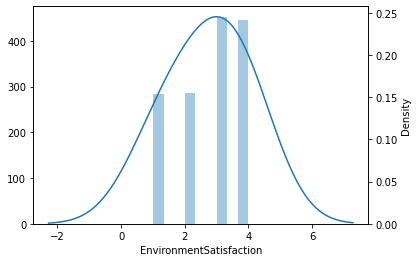

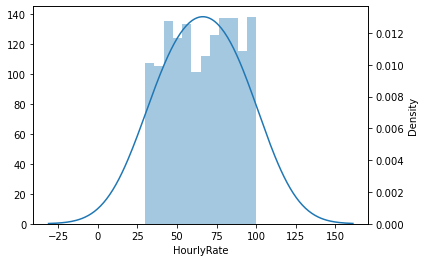

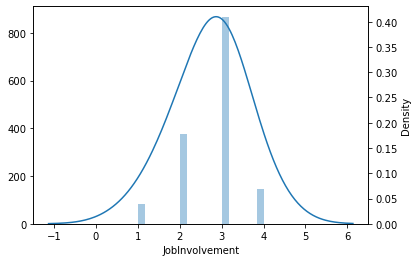

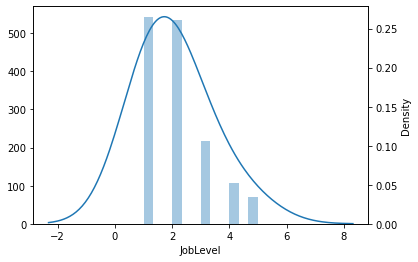

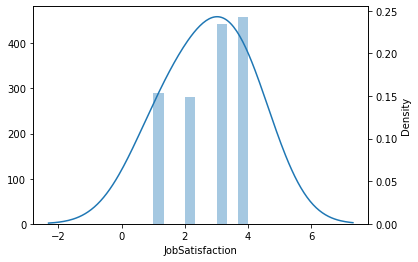

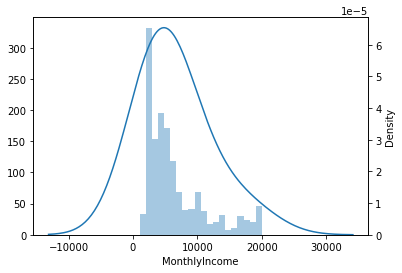

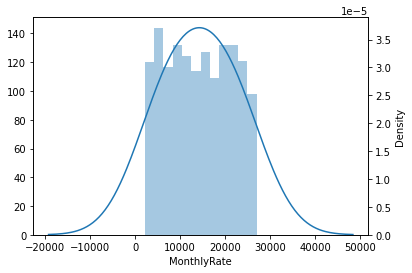

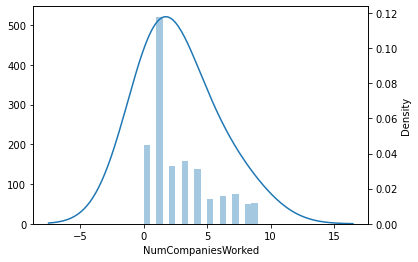

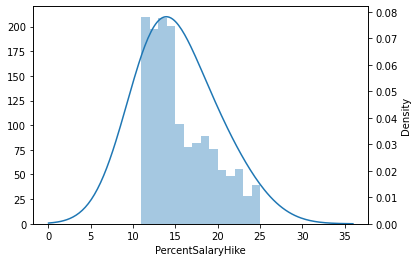

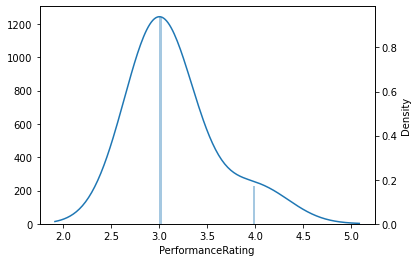

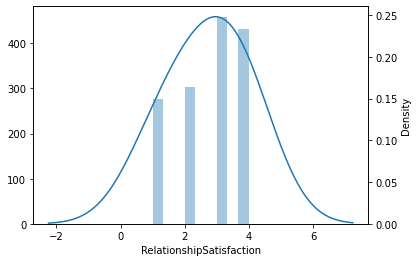

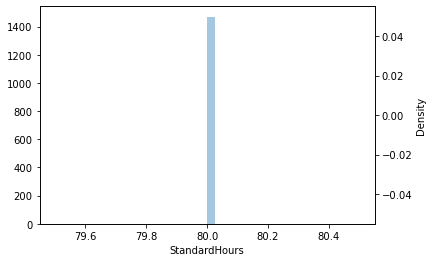

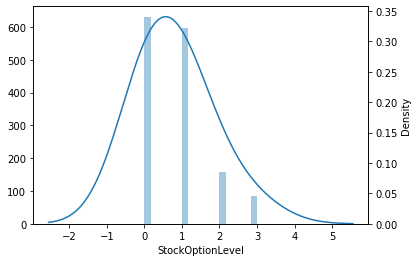

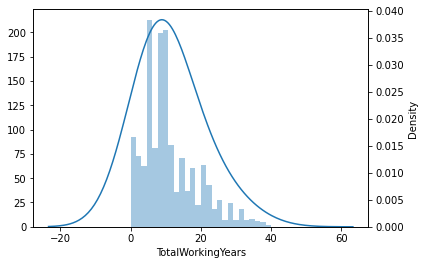

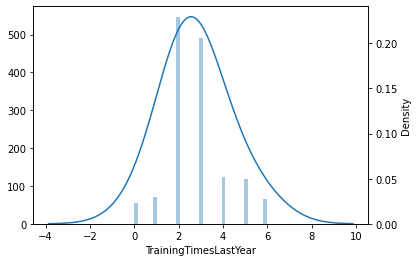

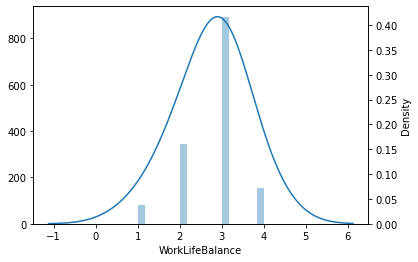

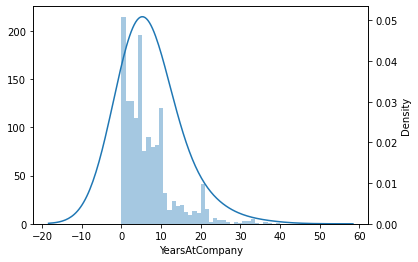

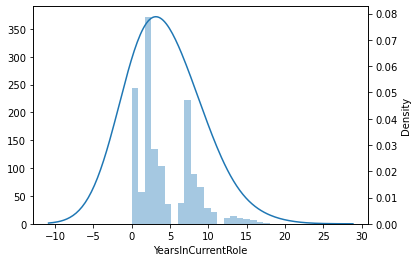

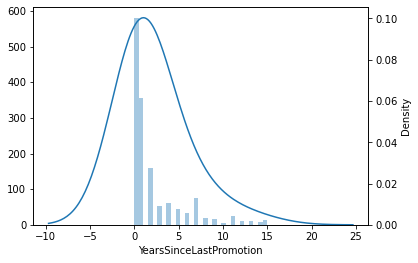

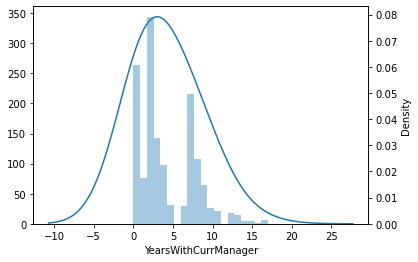

In [404]:
# Exploring the numerical features
# Plot univariate distribution of continuous data

plt.figure(figsize=(30,90),facecolor="white")
plotnumber=1

for i in NumericData:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    sns.distplot(data[i], kde=False, ax=ax1)
    sns.distplot(data[i], hist=False, ax=ax2, kde_kws={'bw':1})
    plt.xlabel(i)
    plotnumber+=1
plt.show()

- Most of the numeric data features look normally distributed. But there are some that look right-skewed.
- Outliers are not quite evident in these graphs.

## Numerical features Vs. Target Variable

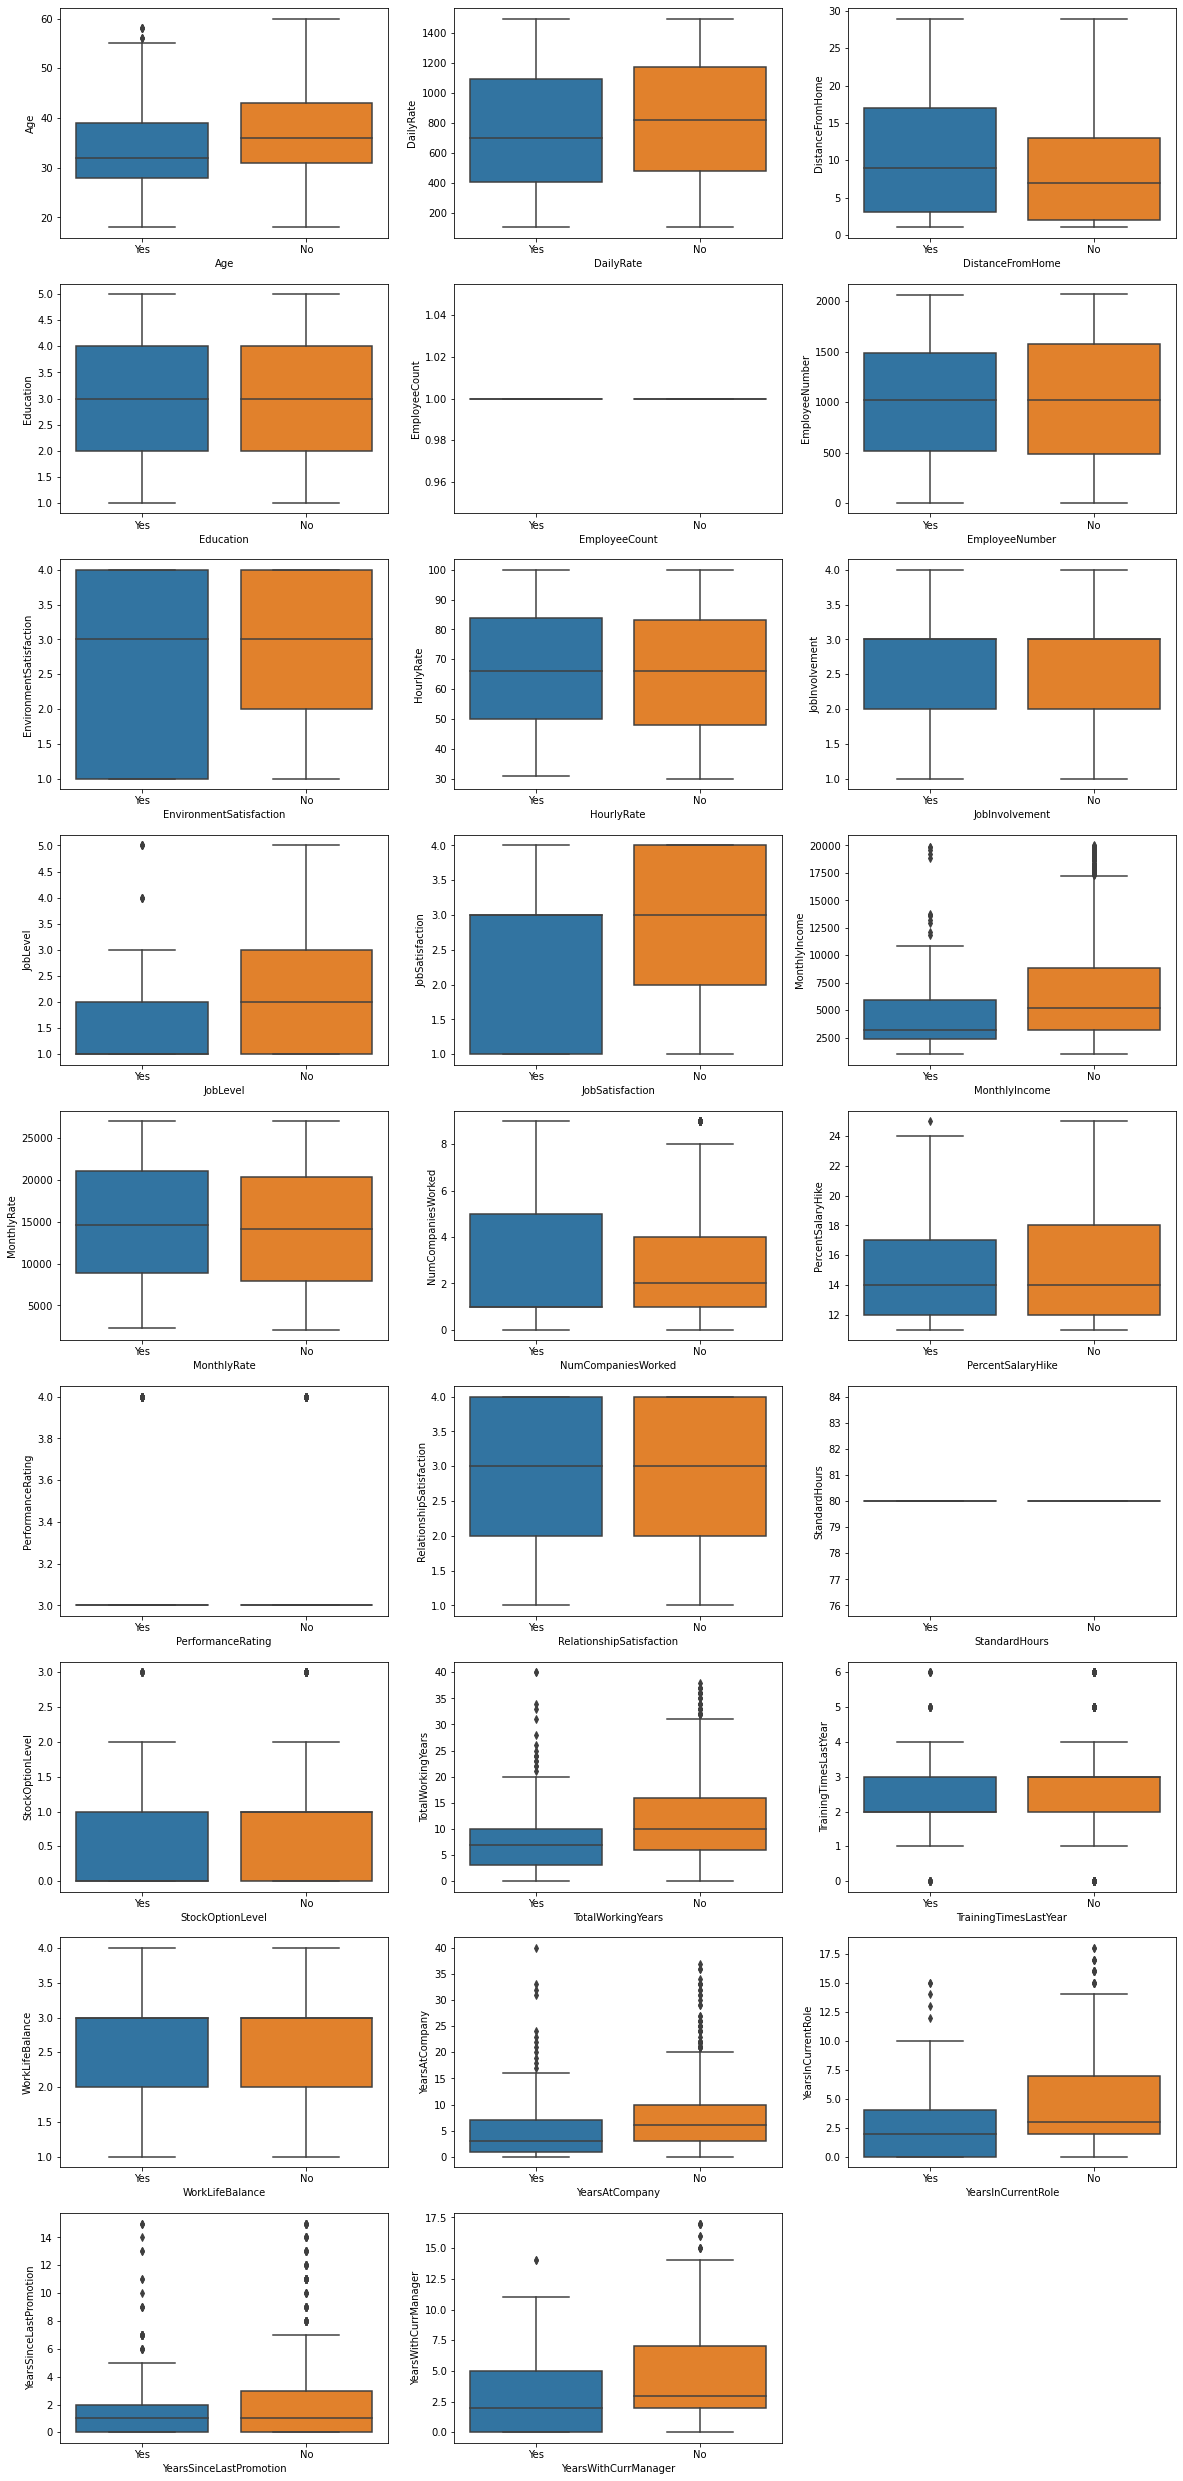

In [405]:
# Relation between numerical features and the label
# Boxplot to show target distribution with respect to numerical features

plt.figure(figsize=(20,60),facecolor="white")
plotnumber=1

for i in NumericData:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x='Attrition',y=data[i],data=data)
    plt.xlabel(i)
    plotnumber+=1
plt.show()

The graphs show that there are outliers in numeric data.
Also, the most relevant insights from data are:
Attrition is higher when:
- People are under 40 years old.
- Daily rate is low.
- Distance from home is long.
- Education is irrelevant as employee number, employee count, Hourly Rate, job involvement.
- Attrition can happen at all levels of Environment Satisfaction.
- There is low job satisfaction, that is, below 3 points.
- Job level is low.
- Monthly Income is low.
- People have worked in many companies.
- Total working years is low, but there are special cases that don't follow this normal distribution of data (outliers).
- When features related to time is low.

## Outliers in numerical features

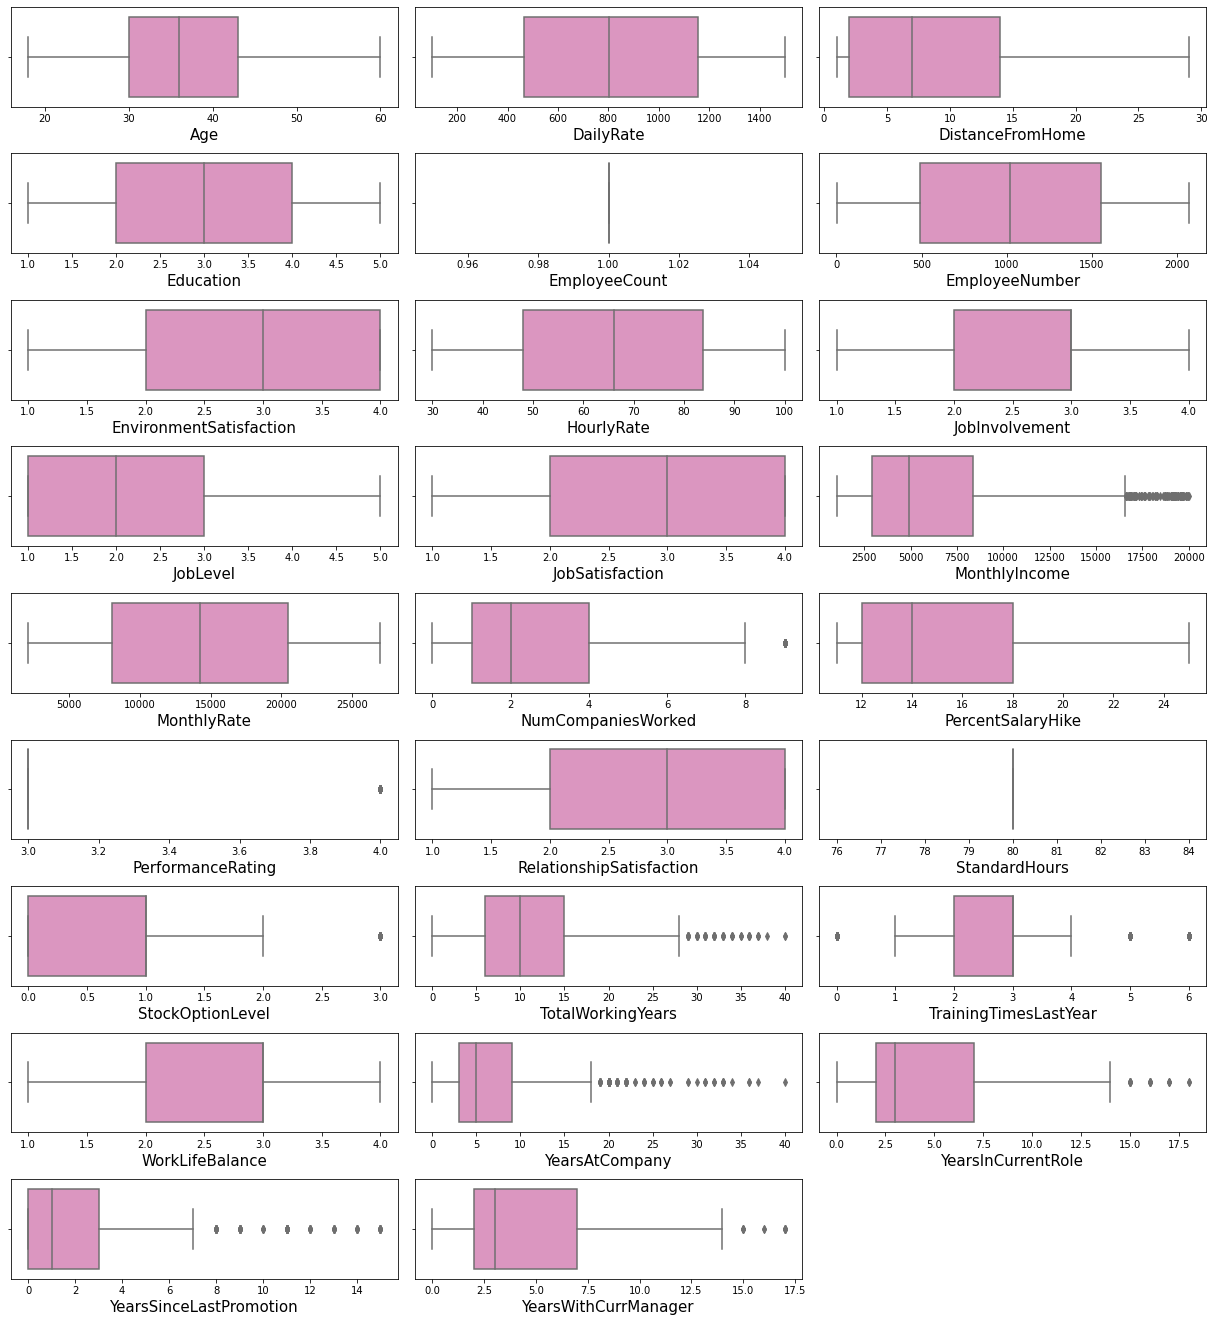

In [407]:
# Let's check the outliers by plotting boxplot.

plt.figure(figsize=(17,20),facecolor="white")
plotnumber=1
for col in NumericData:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(data[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

There are outliers in the following features:
- MonthhlyIncome
- NumCompaniesWorked
- Performance Rating
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

## Feature Engineering

### Drop unwanted features

We can see that there are features with one value like the following:
- These features can be dropped, since they will not have a significant meaning.
- I have also dropped PerformanceRating since 85% of the data has one value=3, the other 15% has value 4. This causes skewness in the dataset that cannot be corrected with any method.

In [408]:
# Checking number of unique values in each column
# If there is a feature with just one value, it can be dropped.

dropF=['PerformanceRating']
for i in data:
    if data[i].nunique()==1:
       dropF.append(i) 
print(dropF)

['PerformanceRating', 'EmployeeCount', 'Over18', 'StandardHours']


In [409]:
data.drop(dropF,axis=1,inplace=True)
data.shape

(1470, 31)

## Remove Outliers

In [410]:
#NumericData

In [411]:
# Z-Score Method

from scipy.stats import zscore

out_features=data[['Age','DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction',
 'HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
 'PercentSalaryHike','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
z=np.abs(zscore(out_features))
z

array([[0.4463504 , 0.74252653, 1.01090934, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 1.2977746 , 0.14714972, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 1.41436324, 0.88751511, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 1.60518328, 0.64072665, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.54667746, 0.88751511, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.43256792, 0.14714972, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [412]:
# Threshold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([22, 21, 19, 21, 20, 21, 16, 16, 19, 21, 20, 21, 22, 16, 19, 21, 22,
        21, 16, 22, 19, 20, 21, 20, 22, 19, 21, 16, 19, 20, 21, 21, 22, 16,
        19, 19, 21, 21, 16, 20, 19, 19, 21, 19, 22, 21, 19, 16, 19, 21, 22,
        16

In [420]:
# Now removing the data above Z-Score (outliers) and creating new DF.

data2=data[(z<3).all(axis=1)]
data2.shape

(1387, 31)

In [421]:
# Shape of Old and New DataFrame
print("Old DataFrame - ",data.shape[0])
print("New DataFrame - ",data2.shape[0])

Old DataFrame -  1470
New DataFrame -  1387


In [422]:
print("Data Loss Percentage - ",((data.shape[0]-data2.shape[0])/data.shape[0]*100))

Data Loss Percentage -  5.646258503401361


## Skewness

In [423]:
# Checking for skewness

data2.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

If we consider the range -0.5 to 0.5 for a symmetric distribution, there are some features, which are out of this range with a moderately to high skewed distribution:
- DistanceFromHome
- JobLevel
- MonthlyIncome
- NumCompaniesWorked
- PercentSalaryHike
- StockOptionLevel
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

## Testing methods to correct skewed data

In [302]:
# Removing skewness using sqrt method.

data2['DistanceFromHome']=np.sqrt(data2['DistanceFromHome'])
data2['JobLevel']=np.sqrt(data2['JobLevel'])
data2['MonthlyIncome']=np.sqrt(data2['MonthlyIncome'])
data2['NumCompaniesWorked']=np.sqrt(data2['NumCompaniesWorked'])
data2['PercentSalaryHike']=np.sqrt(data2['PercentSalaryHike'])
data2['StockOptionLevel']=np.sqrt(data2['StockOptionLevel'])
#data2['TrainingTimesLastYear']=np.sqrt(data2['TrainingTimesLastYear'])
#data2['WorkLifeBalance']=np.sqrt(data2['WorkLifeBalance'])
data2['YearsSinceLastPromotion']=np.sqrt(data2['YearsSinceLastPromotion'])
data2['NumCompaniesWorked']=np.sqrt(data2['NumCompaniesWorked'])
data2['TotalWorkingYears']=np.sqrt(data2['TotalWorkingYears'])
data2['YearsAtCompany']=np.sqrt(data2['YearsAtCompany'])
data2['YearsInCurrentRole']=np.sqrt(data2['YearsInCurrentRole'])
data2['YearsWithCurrManager']=np.sqrt(data2['YearsWithCurrManager'])

In [303]:
# Checking skewness again
data2.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.394018
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.649012
JobSatisfaction            -0.345612
MonthlyIncome               0.950248
MonthlyRate                 0.030596
NumCompaniesWorked         -1.154787
PercentSalaryHike           0.636544
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.063863
TotalWorkingYears           0.042345
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              0.075280
YearsInCurrentRole         -0.318539
YearsSinceLastPromotion     0.629674
YearsWithCurrManager       -0.287532
dtype: float64

In [99]:
data['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [418]:
# Removing skewness using log method.

#data2['DistanceFromHome']=np.log(data2['DistanceFromHome'])
#data2['JobLevel']=np.log(data2['JobLevel'])
#data2['MonthlyIncome']=np.log(data2['MonthlyIncome'])
data2['NumCompaniesWorked']=np.log(data2['NumCompaniesWorked'])
#data2['PercentSalaryHike']=np.log(data2['PercentSalaryHike'])
#data2['StockOptionLevel']=np.log(data2['StockOptionLevel'])
data2['TotalWorkingYears']=np.log(data2['TotalWorkingYears'])
#data2['TrainingTimesLastYear']=np.log(data2['TrainingTimesLastYear'])
#data2['WorkLifeBalance']=np.log(data2['WorkLifeBalance'])
data2['YearsAtCompany']=np.log(data2['YearsAtCompany'])
data2['YearsInCurrentRole']=np.log(data2['YearsInCurrentRole'])
#data2['YearsSinceLastPromotion']=np.log(data2['YearsSinceLastPromotion'])
data2['YearsWithCurrManager']=np.log(data2['YearsWithCurrManager'])

In [419]:
# Checking skewness again
data2.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked               NaN
PercentSalaryHike           0.800592
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears                NaN
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany                   NaN
YearsInCurrentRole               NaN
YearsSinceLastPromotion     1.756335
YearsWithCurrManager             NaN
dtype: float64

In [424]:
# Removing skewness using Cube Root Method.

data2['DistanceFromHome']=np.cbrt(data2['DistanceFromHome'])
data2['JobLevel']=np.cbrt(data2['JobLevel'])
data2['MonthlyIncome']=np.cbrt(data2['MonthlyIncome'])
data2['NumCompaniesWorked']=np.cbrt(data2['NumCompaniesWorked'])
data2['PercentSalaryHike']=np.cbrt(data2['PercentSalaryHike'])
data2['StockOptionLevel']=np.cbrt(data2['StockOptionLevel'])
data2['TotalWorkingYears']=np.cbrt(data2['TotalWorkingYears'])
data2['YearsAtCompany']=np.cbrt(data2['YearsAtCompany'])
data2['YearsSinceLastPromotion']=np.cbrt(data2['YearsSinceLastPromotion'])
#data2['TrainingTimesLastYear']=np.cbrt(data2['TrainingTimesLastYear'])
#data2['WorkLifeBalance']=np.cbrt(data2['WorkLifeBalance'])
#data2['YearsInCurrentRole']=np.cbrt(data2['YearsInCurrentRole'])
#data2['YearsWithCurrManager']=np.cbrt(data2['YearsWithCurrManager'])

In [425]:
# Checking skewness again
data2.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.183373
Education                  -0.289024
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.508238
JobSatisfaction            -0.345612
MonthlyIncome               0.742985
MonthlyRate                 0.030596
NumCompaniesWorked         -0.689329
PercentSalaryHike           0.582921
RelationshipSatisfaction   -0.295686
StockOptionLevel           -0.131820
TotalWorkingYears          -0.563399
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany             -0.700051
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     0.157801
YearsWithCurrManager        0.694506
dtype: float64

The best method to correct skewness has been the Cube Root Method. Due to the nature of the dataset, it seems that an approximation to symmetrical distribution lies between -0.75 and 0.75.

In [426]:
NumericData2=[i for i in data2.columns if ((data2[i].dtypes!='object')& (i not in ['Attrition']))]

<Figure size 2160x6480 with 0 Axes>

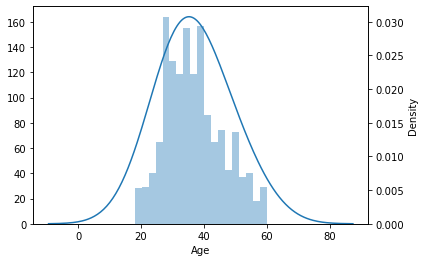

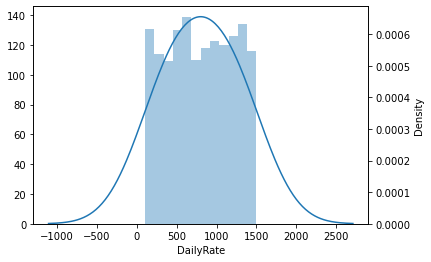

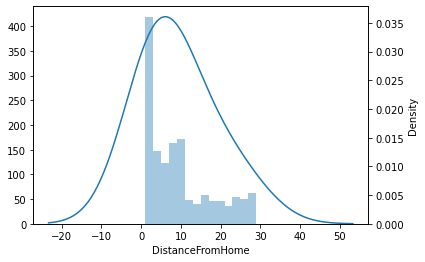

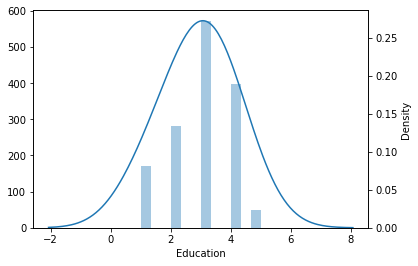

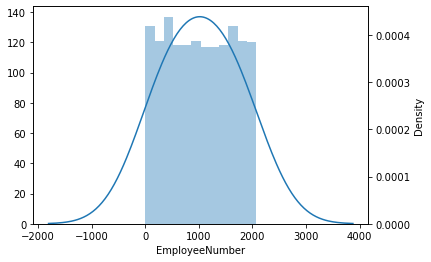

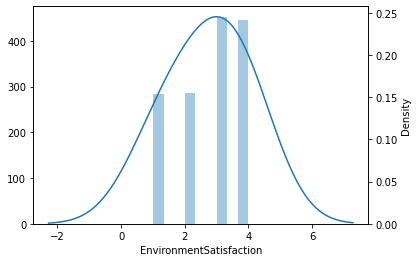

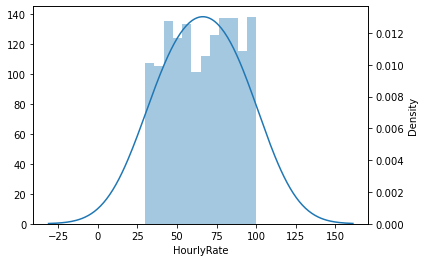

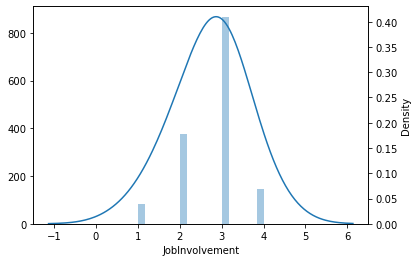

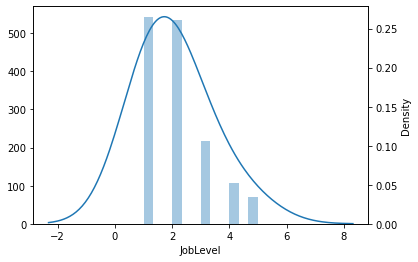

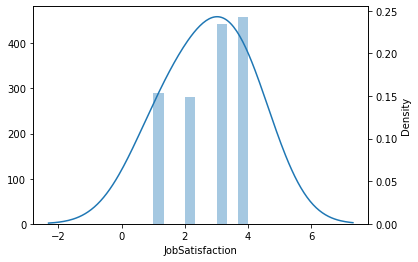

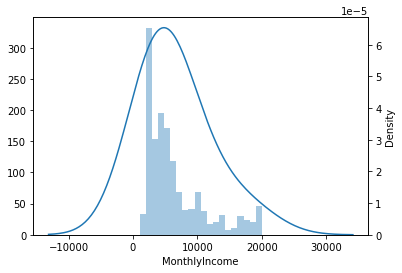

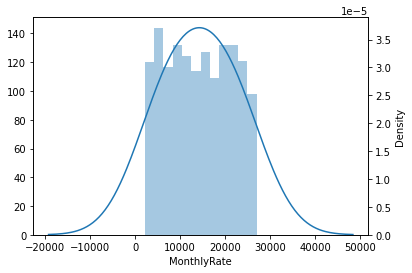

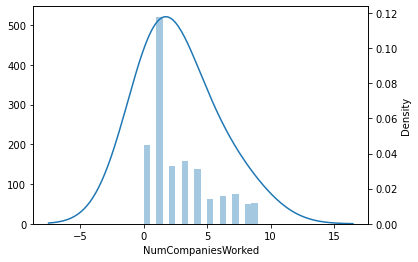

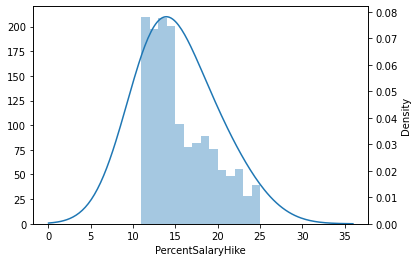

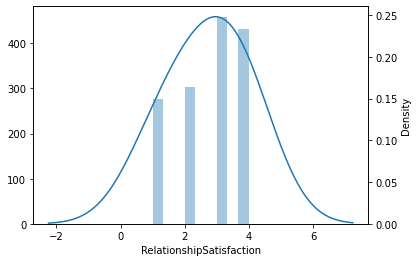

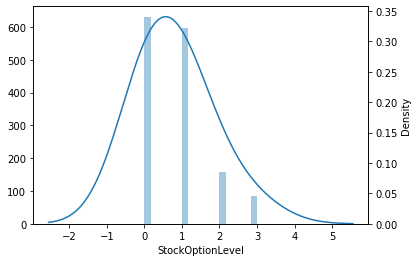

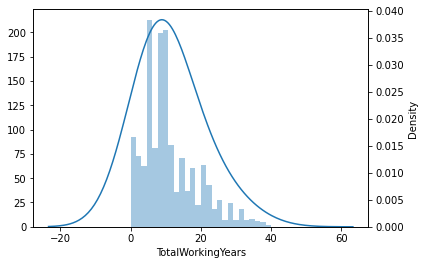

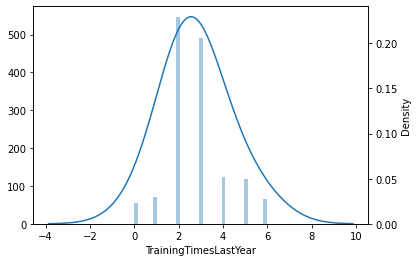

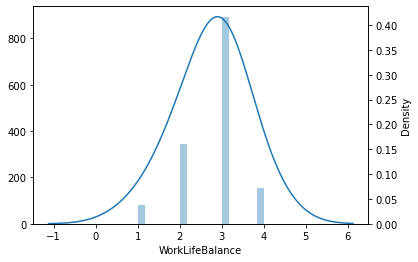

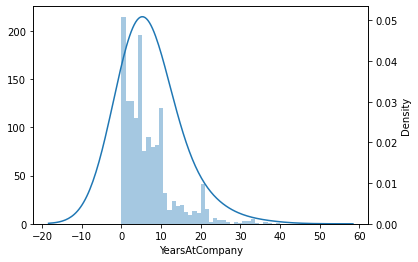

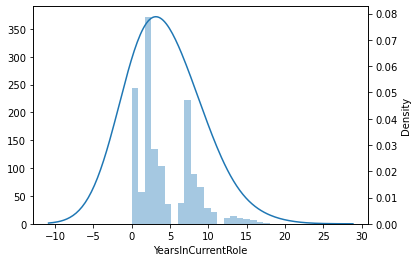

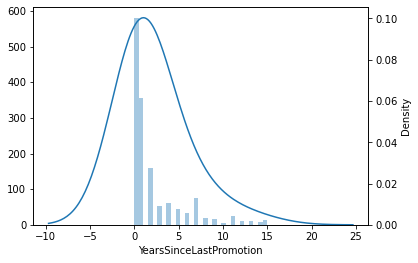

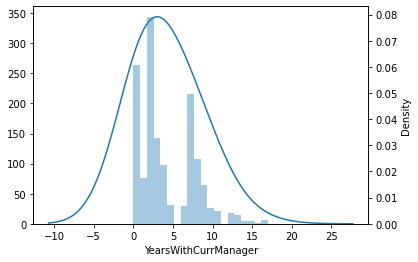

In [427]:
# let's visualize how the data has been distributed in Volume after removing skewness

plt.figure(figsize=(30,90),facecolor="white")
plotnumber=1

for i in NumericData2:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    sns.distplot(data[i], kde=False, ax=ax1)
    sns.distplot(data[i], hist=False, ax=ax2, kde_kws={'bw':1})
    plt.xlabel(i)
    plotnumber+=1
plt.show()

Skewness has been corrected. There are few features with a distribution that is moderately skewed ranges -0-75 to 0-75, which could not be corrected by any method.

## Encode Categorical Features

In [428]:
print(categoricalFeatures)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [429]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
categoricalColumns=['Attrition']
OE=OrdinalEncoder()
for i in data2.columns:
    if data2[i].dtypes=="object":
        data2[i]=OE.fit_transform(data2[i].values.reshape(-1,1)) # We are fitting the data so that it can find out the variance, the different patterns and after that it is transforming the data.
data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1.000000,2,1.0,1,2,...,2.223980,1,0.0,2.000000,0,1,1.817121,4,0.000000,5
1,49,0.0,1.0,279,1.0,2.000000,1,1.0,2,3,...,2.843867,4,1.0,2.154435,3,3,2.154435,7,1.000000,7
2,37,1.0,2.0,1373,1.0,1.259921,2,4.0,4,4,...,2.466212,2,0.0,1.912931,3,3,0.000000,0,0.000000,0
3,33,0.0,1.0,1392,1.0,1.442250,4,1.0,5,4,...,2.223980,3,0.0,2.000000,3,3,2.000000,7,1.442250,0
4,27,0.0,2.0,591,1.0,1.259921,1,3.0,7,1,...,2.289428,4,1.0,1.817121,3,3,1.259921,2,1.259921,2


In [430]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1387 non-null   int64  
 1   Attrition                 1387 non-null   float64
 2   BusinessTravel            1387 non-null   float64
 3   DailyRate                 1387 non-null   int64  
 4   Department                1387 non-null   float64
 5   DistanceFromHome          1387 non-null   float64
 6   Education                 1387 non-null   int64  
 7   EducationField            1387 non-null   float64
 8   EmployeeNumber            1387 non-null   int64  
 9   EnvironmentSatisfaction   1387 non-null   int64  
 10  Gender                    1387 non-null   float64
 11  HourlyRate                1387 non-null   int64  
 12  JobInvolvement            1387 non-null   int64  
 13  JobLevel                  1387 non-null   float64
 14  JobRole 

Categorical features have been converted into numerical data type features using Ordinal Encoding Method. We can seee, these features have been encoded in float values.

## Correlation

In [431]:
## Explore the correlation between numerical features in train dataset
cor=data2.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,0.022340,0.021946,-0.038242,-0.025336,0.198502,-0.032676,-0.002704,0.014098,...,0.008383,0.041744,0.086748,0.627064,-0.019008,-0.016913,0.177960,0.121508,0.101450,0.121747
Attrition,-0.159366,1.000000,-0.001041,-0.057220,0.063637,0.082048,-0.032703,0.023585,-0.010169,-0.112393,...,-0.009754,-0.052344,-0.185386,-0.228715,-0.057285,-0.062492,-0.203407,-0.171015,-0.052245,-0.162297
BusinessTravel,0.022340,-0.001041,1.000000,-0.004606,-0.003521,-0.018892,-0.010560,0.022576,-0.013273,0.001183,...,-0.024410,-0.029660,-0.012102,0.042392,0.010322,-0.014140,-0.008602,-0.029257,-0.027602,-0.044321
DailyRate,0.021946,-0.057220,-0.004606,1.000000,-0.005398,-0.004974,-0.018442,0.040645,-0.044886,0.033123,...,0.028576,0.004516,0.047603,0.044422,0.005861,-0.044266,0.009147,0.022899,-0.037737,-0.011516
Department,-0.038242,0.063637,-0.003521,-0.005398,1.000000,0.035218,0.012846,0.013432,-0.007828,-0.014540,...,-0.020465,-0.037705,-0.002079,-0.007723,0.036092,0.026978,0.013848,0.065536,0.017221,0.034216
DistanceFromHome,-0.025336,0.082048,-0.018892,-0.004974,0.035218,1.000000,0.002841,0.010756,0.034088,-0.013476,...,0.036405,0.009816,0.025771,-0.004807,-0.019576,-0.029395,0.009664,0.011025,-0.000831,0.001193
Education,0.198502,-0.032703,-0.010560,-0.018442,0.012846,0.002841,1.000000,-0.038017,0.042707,-0.026223,...,-0.008641,-0.002393,0.025008,0.155944,-0.026879,0.007844,0.036109,0.058007,0.014855,0.031210
EducationField,-0.032676,0.023585,0.022576,0.040645,0.013432,0.010756,-0.038017,1.000000,0.000058,0.047924,...,-0.007318,-0.013734,-0.017829,-0.004469,0.050502,0.034038,0.001351,-0.010614,0.021206,0.013437
EmployeeNumber,-0.002704,-0.010169,-0.013273,-0.044886,-0.007828,0.034088,0.042707,0.000058,1.000000,0.011003,...,-0.019669,-0.063017,0.050435,0.000936,0.018555,0.006280,0.018413,-0.001112,0.013499,-0.006224
EnvironmentSatisfaction,0.014098,-0.112393,0.001183,0.033123,-0.014540,-0.013476,-0.026223,0.047924,0.011003,1.000000,...,-0.026877,0.018414,0.029448,-0.018817,-0.019318,0.032492,0.010151,0.038837,0.041294,0.001606


The data shows the correlation between all features. We can visualize it by plotting a heatmap.

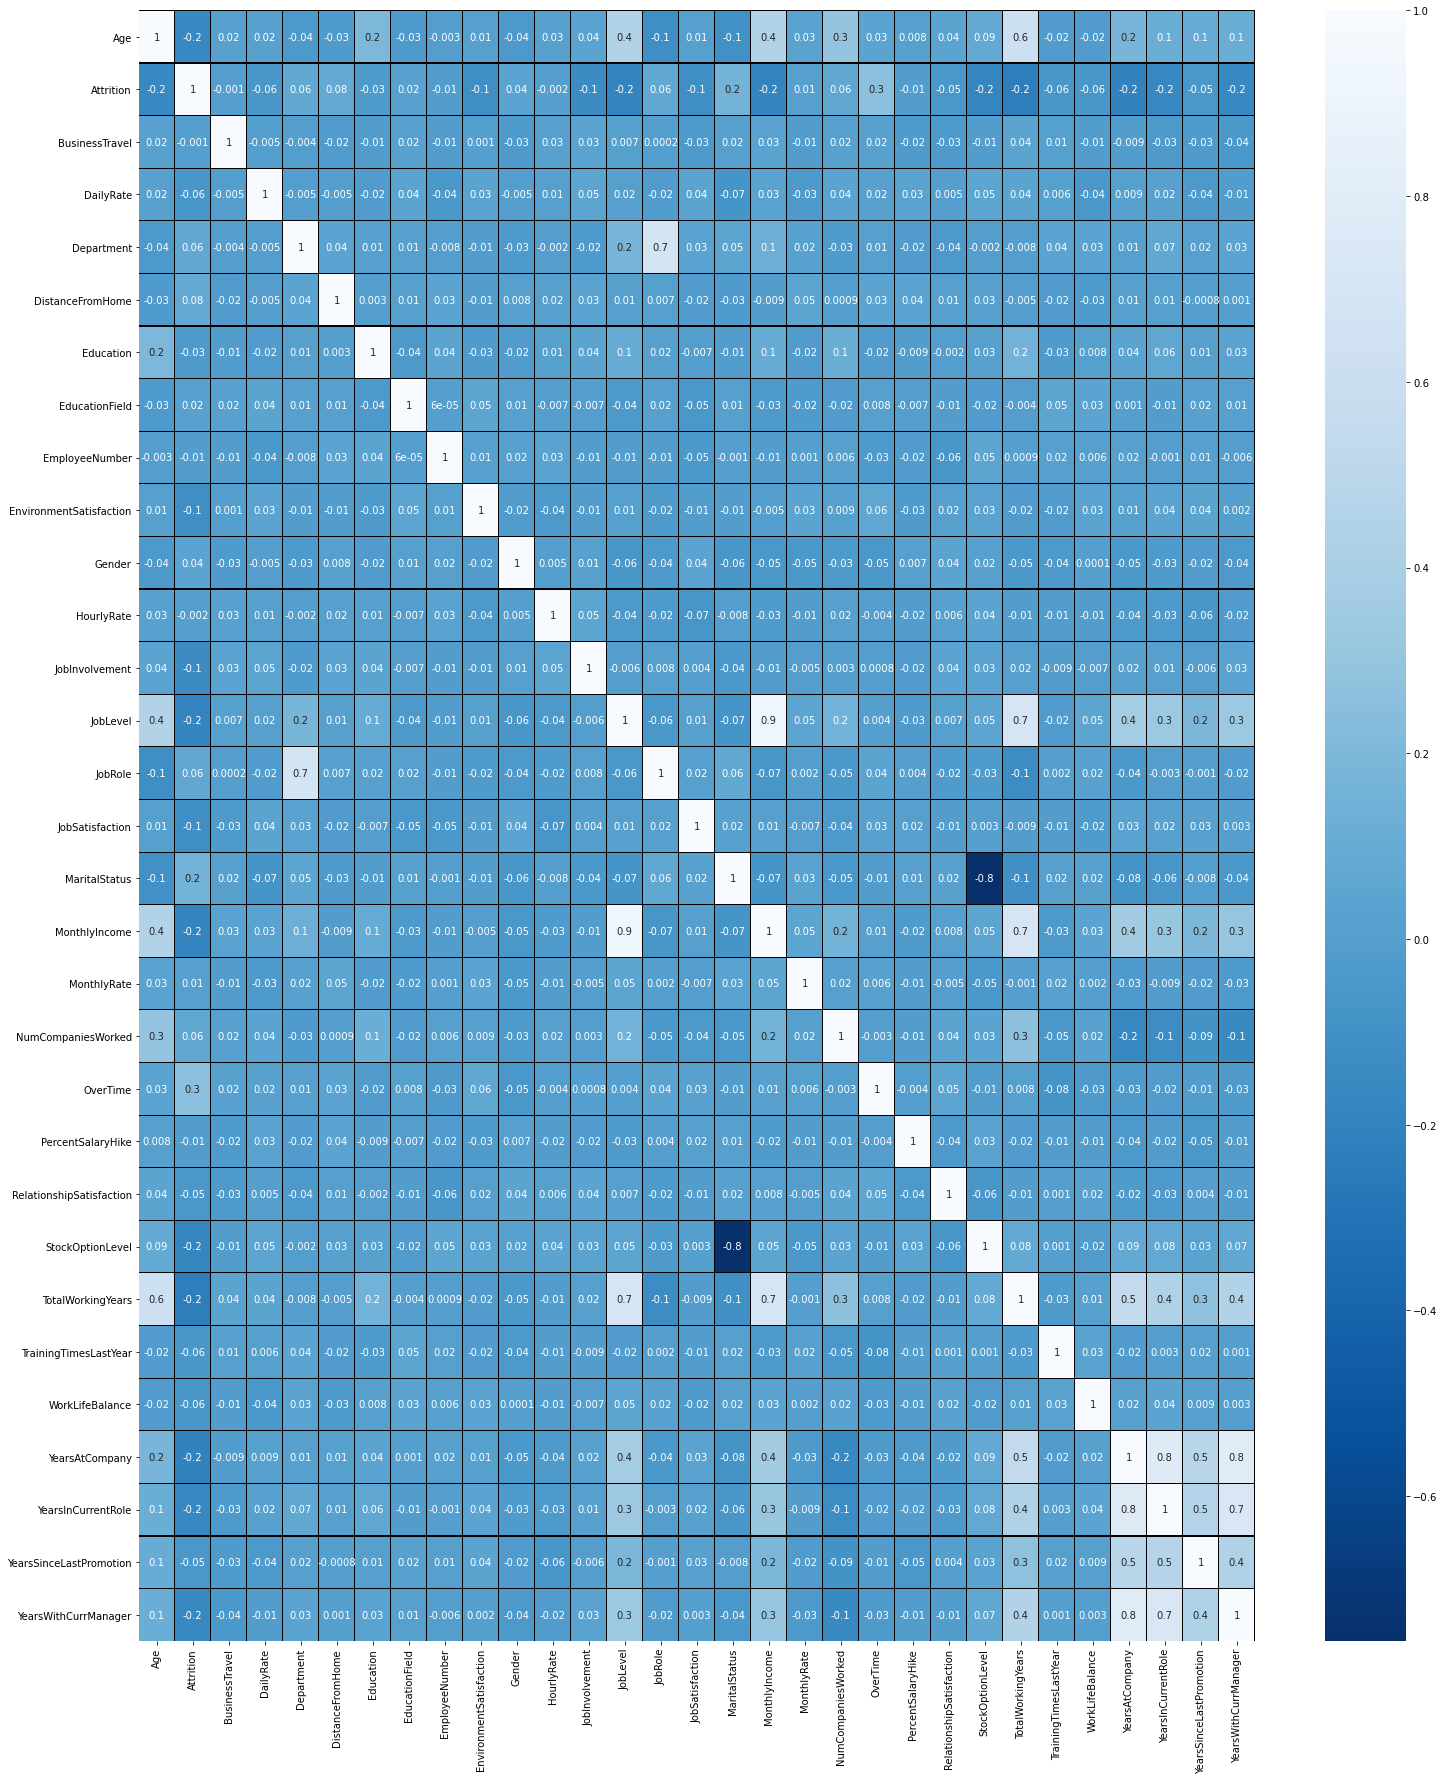

In [432]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(25,30))
sns.heatmap(data2.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

From the Heatmap plot we can see there is are features which are negatively and positively correlated to each other, and with the target variable.

In [433]:
## Correlation values Independent Variables vs. Target Variable
data2.corr().Attrition.sort_values()

TotalWorkingYears          -0.228715
YearsAtCompany             -0.203407
JobLevel                   -0.187482
MonthlyIncome              -0.187076
StockOptionLevel           -0.185386
YearsInCurrentRole         -0.171015
YearsWithCurrManager       -0.162297
Age                        -0.159366
JobInvolvement             -0.133957
JobSatisfaction            -0.114206
EnvironmentSatisfaction    -0.112393
WorkLifeBalance            -0.062492
TrainingTimesLastYear      -0.057285
DailyRate                  -0.057220
RelationshipSatisfaction   -0.052344
YearsSinceLastPromotion    -0.052245
Education                  -0.032703
EmployeeNumber             -0.010169
PercentSalaryHike          -0.009754
HourlyRate                 -0.001532
BusinessTravel             -0.001041
MonthlyRate                 0.014888
EducationField              0.023585
Gender                      0.036252
NumCompaniesWorked          0.055629
Department                  0.063637
JobRole                     0.064283
D

### Visualizing the correlation between label and features using bar plot

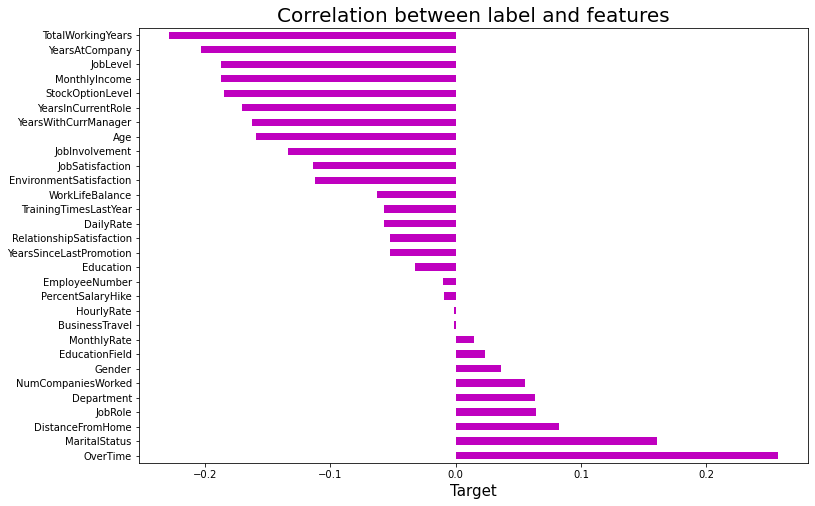

In [434]:
plt.figure(figsize=(12,8))
data2.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='barh',color="m")
plt.xlabel('Feature',fontsize=15)
plt.xlabel('Target',fontsize=15)
plt.title("Correlation between label and features",fontsize=20)
plt.show()

As shown by data and the graph above, there are positive and negative correlated features with the target variable in the range of -0.25 to 0.25, being this a weak correlation.

- Despite this weak correlation, the variables that are the most positively correlated with the target variable are:
    - OverTime 
    - MaritalStatus
    - DistanceFromHome
    
- The variables that are the most negatively correlated with the target variable are:
    - TotalWorkingYears
    - YearsAtCompany
    - JobLevel
    - MonthlyIncome
    - StockOptionLevel

## Separating features and label

In [435]:
x=data2.drop('Attrition',axis=1)
y=data2['Attrition']

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (1387, 30)
Label Dimension (1387,)


## Feature Scaling using Standard Scalarization

In [436]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.734325,1.405373,-1.410317,-0.876177,-0.940815,-1.702014,-0.665328,-1.229911,...,-1.262488,-1.575817,-1.122916,-0.114048,-2.171420,-2.501172,0.252482,0.040903,-1.092503,0.368270
1,1.442111,-0.905354,-1.307769,-0.496337,0.161865,-1.853858,-0.940815,-1.700354,0.251978,0.813067,...,2.010104,1.199034,0.678498,0.184647,0.151871,0.336558,0.878987,0.965895,0.294582,0.982200
2,0.083966,0.593126,1.406752,-0.496337,-1.001674,-0.876177,1.305159,-1.697034,1.169285,0.813067,...,0.016336,-0.650866,-1.122916,-0.282450,0.151871,0.336558,-3.122519,-1.192419,-1.092503,-1.166556
3,-0.368749,-0.905354,1.453896,-0.496337,-0.715020,1.079185,-0.940815,-1.695374,1.169285,-1.229911,...,-1.262488,0.274084,-1.122916,-0.114048,0.151871,0.336558,0.592150,0.965895,0.908019,-1.166556
4,-1.047821,0.593126,-0.533609,-0.496337,-1.001674,-1.853858,0.556501,-1.692054,-1.582635,0.813067,...,-0.916964,1.199034,0.678498,-0.467759,0.151871,0.336558,-0.782424,-0.575758,0.655114,-0.552626
5,-0.481928,-0.905354,0.493641,-0.496337,-1.001674,-0.876177,-0.940815,-1.690394,1.169285,0.813067,...,-0.590140,0.274084,-1.122916,-0.114048,-0.622559,-1.082307,0.430434,0.965895,0.908019,0.675235
6,2.573899,0.593126,1.285169,-0.496337,-0.715020,0.101504,0.556501,-1.687074,0.251978,-1.229911,...,1.326697,-1.575817,1.475172,0.445742,0.151871,-1.082307,-1.265184,-1.192419,-1.092503,-1.166556
7,-0.708285,0.593126,1.369532,-0.496337,1.552459,-1.853858,-0.940815,-1.685414,1.169285,0.813067,...,1.789282,-0.650866,0.678498,-2.048170,-0.622559,0.336558,-1.265184,-1.192419,-1.092503,-1.166556
8,0.197145,-0.905354,-1.464089,-0.496337,1.488578,0.101504,-0.940815,-1.683754,1.169285,0.813067,...,1.561662,-0.650866,-1.122916,0.184647,-0.622559,0.336558,0.740892,0.965895,0.294582,1.289165
9,-0.029213,0.593126,1.223137,-0.496337,1.734047,0.101504,0.556501,-1.682094,0.251978,0.813067,...,-0.590140,-0.650866,1.146723,0.990880,0.151871,-1.082307,0.430434,0.965895,1.560895,0.982200


The data has been scaled using the Standard Scalarization to overcome bias.

## Feature Selection - Drop highly correlated features

In [437]:
# Get upper triangle of correlation matrix
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))

In [438]:
# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['MonthlyIncome']

According to this method, the features with a correlation greater than 0.90 is 'MonthlyIncome'. I will drop it to avoid rendundancy.

In [439]:
# Drop highly correlated features from dataset

x.drop(to_drop,axis=1,inplace=True)
x.shape

(1387, 29)

## Checking Variance Inflation Factor

In [440]:
# Finding the Variance Inflation Factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

vif["VIF values"]=[variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.847090,Age
1,1.016953,BusinessTravel
2,1.027948,DailyRate
3,2.085114,Department
4,1.014990,DistanceFromHome
5,1.061424,Education
6,1.020496,EducationField
7,1.022656,EmployeeNumber
8,1.025282,EnvironmentSatisfaction
9,1.025837,Gender


VIF values below 5 show that the data is moderately correlated. If we check the correlation matrix, we can see that JobLevel and MontlyIncome are highly correlated with more than 1 independent feature. So, therefore, it was necessary to drop one of those, in this case, MonthlyIncome, to sort the Multicollinearity issue.

In [441]:
# Check if data is balanced

y.value_counts()

0.0    1158
1.0     229
Name: Attrition, dtype: int64

The data is not balanced. I will apply the Oversampling method to balance it.

## Oversampling

In [442]:
# Oversampling the data

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [443]:
# Checking the value count of target column y1
y1.value_counts()

0.0    1158
1.0    1158
Name: Attrition, dtype: int64

The data is now balanced.

## Modelling

In [444]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "at random_state",maxRS)

Best accuracy is  0.9697841726618706 at random_state 160


## Creating train test split

In [445]:
# Train test split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

## Classification Algorithms

In [446]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [447]:
# Checking the accuracy for RandomForestClassifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
acc_RFC=accuracy_score(y_test,predRFC)
print(acc_RFC)
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9741007194244604
[[340   7]
 [ 11 337]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       347
         1.0       0.98      0.97      0.97       348

    accuracy                           0.97       695
   macro avg       0.97      0.97      0.97       695
weighted avg       0.97      0.97      0.97       695



In [448]:
# Checking the accuracy for Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
acc_LR=accuracy_score(y_test,predLR)
print(acc_LR)
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8014388489208633
[[263  84]
 [ 54 294]]
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79       347
         1.0       0.78      0.84      0.81       348

    accuracy                           0.80       695
   macro avg       0.80      0.80      0.80       695
weighted avg       0.80      0.80      0.80       695



In [449]:
# Checking the accuracy for Support Vector Machine Classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
acc_SVC=accuracy_score(y_test,predsvc)
print(acc_SVC)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9338129496402877
[[315  32]
 [ 14 334]]
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       347
         1.0       0.91      0.96      0.94       348

    accuracy                           0.93       695
   macro avg       0.94      0.93      0.93       695
weighted avg       0.93      0.93      0.93       695



In [450]:
# Checking the accuracy for Gradient Boosting Classifier

GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
acc_GB=accuracy_score(y_test,predGB)
print(acc_GB)
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9467625899280575
[[327  20]
 [ 17 331]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       347
         1.0       0.94      0.95      0.95       348

    accuracy                           0.95       695
   macro avg       0.95      0.95      0.95       695
weighted avg       0.95      0.95      0.95       695



In [451]:
# Checking the accuracy for AdaBoost Classifier

ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
acc_ABC=accuracy_score(y_test,predABC)
print(acc_ABC)
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.9280575539568345
[[314  33]
 [ 17 331]]
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93       347
         1.0       0.91      0.95      0.93       348

    accuracy                           0.93       695
   macro avg       0.93      0.93      0.93       695
weighted avg       0.93      0.93      0.93       695



In [452]:
# Checking the accuracy for Bagging Classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
acc_BC=accuracy_score(y_test,predBC)
print(acc_BC)
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9035971223021583
[[313  34]
 [ 33 315]]
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       347
         1.0       0.90      0.91      0.90       348

    accuracy                           0.90       695
   macro avg       0.90      0.90      0.90       695
weighted avg       0.90      0.90      0.90       695



In [453]:
# Checking the accuracy for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
acc_ET=accuracy_score(y_test,predET)
print(acc_ET)
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9726618705035971
[[331  16]
 [  3 345]]
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       347
         1.0       0.96      0.99      0.97       348

    accuracy                           0.97       695
   macro avg       0.97      0.97      0.97       695
weighted avg       0.97      0.97      0.97       695



In [454]:
# Checking all algorithm results

results_alg=pd.DataFrame({'Model':['RandomForestClassifier','Logistic Regression', 'Support Vector Machine Classifier(SVC)', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'ExtraTreesClassifier'],'Accuracy':[acc_RFC,acc_LR,acc_SVC,acc_GB,acc_ABC,acc_BC,acc_ET]})
results_alg.index+=1
results_alg

,Model,Accuracy
1,RandomForestClassifier,0.974101
2,Logistic Regression,0.801439
3,Support Vector Machine Classifier(SVC),0.933813
4,Gradient Boosting Classifier,0.946763
5,AdaBoost Classifier,0.928058
6,Bagging Classifier,0.903597
7,ExtraTreesClassifier,0.972662


RandomForestClassifier has the highest accuracy score.

## Cross Validation Score

In [456]:
from sklearn.model_selection import cross_val_score

In [457]:
# Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
diff_RFC=accuracy_score(y_test,predRFC)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_RFC)

[0.85251799 0.86330935 0.85920578 0.84837545 0.84476534]
0.8536347817053217
Difference between Accuracy Score and Cross Validation Score is 0.12046593771913872


In [458]:
# Checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
diff_LR=accuracy_score(y_test,predLR)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_LR)

[0.87410072 0.84892086 0.86281588 0.8700361  0.87364621]
0.8659039555359322
Difference between Accuracy Score and Cross Validation Score is -0.06446510661506899


In [459]:
# Checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
diff_GB=accuracy_score(y_test,predGB)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_GB)

[0.85251799 0.86330935 0.86281588 0.85559567 0.84837545]
0.8565228683479209
Difference between Accuracy Score and Cross Validation Score is 0.0902397215801366


In [460]:
# Checking cv score for Support Vector Machine Classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
diff_SVC=accuracy_score(y_test,predsvc)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_SVC)

[0.87410072 0.84532374 0.8700361  0.85920578 0.8700361 ]
0.8637404877542009
Difference between Accuracy Score and Cross Validation Score is 0.07007246188608685


In [461]:
# Checking cv score for AdaBoosting Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
diff_ABC=accuracy_score(y_test,predABC)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_ABC)

[0.83453237 0.87410072 0.86642599 0.87725632 0.84837545]
0.8601381710516064
Difference between Accuracy Score and Cross Validation Score is 0.06791938290522814


In [462]:
# Checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
diff_BC=accuracy_score(y_test,predBC)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_BC)

[0.83453237 0.84532374 0.83754513 0.85198556 0.83393502]
0.8406643638158066
Difference between Accuracy Score and Cross Validation Score is 0.06293275848635171


In [463]:
# Checking cv score for ExtraTrees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
diff_ET=accuracy_score(y_test,predET)-score.mean()
print("Difference between Accuracy Score and Cross Validation Score is",diff_ET)

[0.85251799 0.84892086 0.85920578 0.84476534 0.85198556]
0.851479105524245
Difference between Accuracy Score and Cross Validation Score is 0.1211827649793521


In [464]:
# Checking for the least difference between Accuracy Score and Cross Validation Score per algorithm

diff=pd.DataFrame({'Model':['RandomForestClassifier','Logistic Regression', 'Support Vector Machine Classifier(SVC)', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'ExtraTreesClassifier'],'Difference':[diff_RFC,diff_LR,diff_SVC,diff_GB,diff_ABC,diff_BC,diff_ET]})
diff.index+=1
diff

,Model,Difference
1,RandomForestClassifier,0.120466
2,Logistic Regression,-0.064465
3,Support Vector Machine Classifier(SVC),0.070072
4,Gradient Boosting Classifier,0.090240
5,AdaBoost Classifier,0.067919
6,Bagging Classifier,0.062933
7,ExtraTreesClassifier,0.121183


Bagging Classifier has the least difference and the model accuracy is good.
Thus, as per model performance analysis and cross validation scores, Bagging Classifier, seems to be the best model.

## Hyperparameter Tuning

In [469]:
# To increase the performance of the model
# Bagging Classifier Classifier

from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[2,5,10,15],
           'max_samples':[200,500,700,1000,1200],
           'bootstrap':[True],
           'n_jobs':[1,-1]}

In [470]:
GCV=GridSearchCV(BaggingClassifier(),parameters,cv=5)

In [471]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True],
                         'max_samples': [200, 500, 700, 1000, 1200],
                         'n_estimators': [2, 5, 10, 15], 'n_jobs': [1, -1]})

In [472]:
GCV.best_params_

{'bootstrap': True, 'max_samples': 1200, 'n_estimators': 15, 'n_jobs': -1}

In [474]:
# Final Model

Final_model=BaggingClassifier(bootstrap=True, max_samples= 1200, n_estimators= 15, n_jobs= -1)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.37410071942446


After hyperparameter tuning, the performance of the model has improved from 90.36% to 92.37%.

## Saving the model

In [475]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"HR_Analytics_Project.pkl")

['HR_Analytics_Project.pkl']

## Predicting the saved model

In [476]:
# Let's load the saved model and get the predictions

model=joblib.load("HR_Analytics_Project.pkl")

# Prediction
prediction=model.predict(x_test)
prediction

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1.

Here we can see the prediction of employee attrition.

In [477]:
# Checking if the model is giving the correct prediction

a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
5,0.0,0.0
6,0.0,0.0
7,1.0,1.0
8,0.0,1.0
9,1.0,1.0


The model is giving good predictions, when comparing to original values.